## Machine Learning Zoomcamp - Homework 2 - Holley St. Germain

I used Google Colab: https://colab.research.google.com/github/holleyst/mlzoomcamp2023/blob/main/mlzc_hw2.ipynb

Github: https://github.com/holleyst/mlzoomcamp2023/blob/main/mlzc_hw2.ipynb

In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


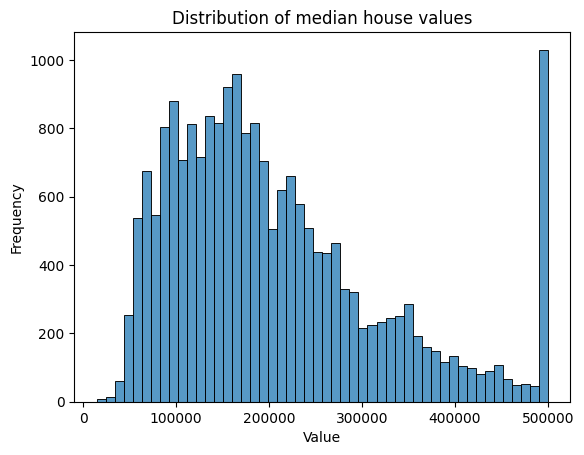

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.histplot(df.median_house_value, bins=50)
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title('Distribution of median house values')
plt.show()

# median_house_value does not have a long tail

Use subset of data for homework:

*   records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`
*   columns:
  *   `latitude`
  *   `longitude`
  *   `housing_median_age`
  *   `total_rooms`
  *   `total_bedrooms`
  *   `population`
  *   `households`
  *   `median_income`
  *   `median_house_value`


In [18]:
data_subset = df.loc[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])][['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]
data_subset

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


Q1: There's one feature with missing values. What is it?

A1: `total_bedrooms`

In [19]:
data_subset.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Q2: What's the median (50% percentile) for variable `population`?

A2: 1195

In [20]:
pop_median = data_subset.population.median()
pop_50th = data_subset.population.quantile(0.50)
print(pop_median, pop_50th)

1195.0 1195.0


Prepare and split dataset:

*   Shuffle dataset, use seed 42
*   Split data in train/val/test sets, with 60%/20%/20% distribution
*   Apply log transformation to `median_house_value` variable using `np.log1p()`


In [32]:
n = len(data_subset)
idx = np.arange(n)

# shuffle dataset, use seed 42
np.random.seed(42)
np.random.shuffle(idx)
data_shuffled = data_subset.iloc[idx]

# split data in train/val/test sets, with 60%/20%/20% distribution
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
data_train = data_shuffled.iloc[:n_train].copy()
data_val = data_shuffled.iloc[n_train:n_train+n_val].copy()
data_test = data_shuffled.iloc[n_train+n_val:].copy()

data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

# apply log transformation to median_house_value
y_train_orig = data_train.median_house_value.values
y_val_orig = data_val.median_house_value.values
y_test_orig = data_test.median_house_value.values
y_train_log = np.log1p(y_train_orig)
y_val_log = np.log1p(y_val_orig)
y_test_log = np.log1p(y_test_orig)

del data_train['median_house_value']
del data_val['median_house_value']
del data_test['median_house_value']



Q3:
*   We need to deal with missing values for the column from Q1.
*   We have two options: fill it with 0 or with the mean of this variable.
*   Try both options. For each, train a linear regression model without regularization using the code from the lessons.
*   For computing the mean, use the training only!
*   Use the validation dataset to evaluate the models and compare the RMSE of each option.
*   Round the RMSE scores to 2 decimal digits using round(score, 2)
*   Which option gives better RMSE? Options:
   *   With 0
   *   With mean
   *   Both are equally good

A3: Both are equally good






In [34]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = np.dot(X.T, X)
    XTX_inv = np.linalg.inv(XTX)
    w = np.dot(np.dot(XTX_inv, X.T), y)
    return w[0], w[1:]

def rmse(y, y_pred):
    mse = ((y_pred-y)**2).mean()
    return np.sqrt(mse)

def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

# fill missing values with 0
X_null_train = prepare_X(data_train, fillna_value=0)
w_0_null, w_null = train_linear_regression(X_null_train, y_train_log)
X_null_val = prepare_X(data_val, fillna_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)
rmse_null = np.round(rmse(y_val_log, y_null_pred_val), 2)

# fill missing values with mean
total_bedrooms_mean = data_train.total_bedrooms.mean()
X_mean_train = prepare_X(data_train, fillna_value=total_bedrooms_mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train_log)
X_mean_val = prepare_X(data_val, fillna_value=total_bedrooms_mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)
rmse_mean = np.round(rmse(y_val_log, y_mean_pred_val), 2)

print(rmse_null, rmse_mean)

0.34 0.34


Q4:
*   Now let's train a regularized linear regression.
*   For this question, fill the NAs with 0.
*   Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
*   Use RMSE to evaluate the model on the validation dataset.
*   Round the RMSE scores to 2 decimal digits.
*   Which r gives the best RMSE? (If there are multiple options, select the smallest r.)
*   Options:
   *   0
   *   0.000001
   *   0.001
   *   0.0001

A4: 0

In [35]:
def train_linear_regression_reg(X, y, r=0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = np.dot(X.T, X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = np.dot(np.dot(XTX_inv, X.T), y)
    return w[0], w[1:]

for r_val in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_null_train, y_train_log, r=r_val)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val_log, y_null_reg_val),2)
    print(r_val, rmse_val)


0 0.34
1e-06 0.34
0.0001 0.34
0.001 0.34
0.01 0.34
0.1 0.34
1 0.34
5 0.35
10 0.35


Q5:
*   We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
*   Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
*   For each seed, do the train/validation/test split with 60%/20%/20% distribution.
*   Fill the missing values with 0 and train a model without regularization.
*   For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
*   What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
*   Round the result to 3 decimal digits (round(std, 3))
*   What's the value of std?
   *   0.5
   *   0.05
   *   0.005
   *   0.0005

> Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

A5: 0.005 (I calculated 0.006, and 0.005 is the closest option)


In [40]:
rmse_list = []
n = len(data_subset)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

for r_val in range(10):
    idx = np.arange(n)
    np.random.seed(r_val)
    np.random.shuffle(idx)
    data_shuffled = data_subset.iloc[idx]
    data_train = data_shuffled.iloc[:n_train].copy()
    data_val = data_shuffled.iloc[n_train:n_train+n_val].copy()
    data_test = data_shuffled.iloc[n_train+n_val:].copy()

    data_train = data_train.reset_index(drop=True)
    data_val = data_val.reset_index(drop=True)
    data_test = data_test.reset_index(drop=True)

    y_train_orig = data_train.median_house_value.values
    y_val_orig = data_val.median_house_value.values
    y_test_orig = data_test.median_house_value.values

    y_train_log = np.log1p(y_train_orig)
    y_val_log = np.log1p(y_val_orig)
    y_test_log = np.log1p(y_test_orig)

    del data_train['median_house_value']
    del data_val['median_house_value']
    del data_test['median_house_value']

    X_null_train = prepare_X(data_train, fillna_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train_log)

    X_null_val = prepare_X(data_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val_log, y_null_reg_val), 2)

    rmse_list.append(rmse_val)

    print(r_val, rmse_val)


np.round(np.std(rmse_list), 3)

0 0.34
1 0.34
2 0.34
3 0.33
4 0.34
5 0.34
6 0.34
7 0.35
8 0.35
9 0.33


0.006

Q6:
*   Split the dataset like previously, use seed 9.
*   Combine train and validation datasets.
*   Fill the missing values with 0 and train a model with r=0.001.
*   What's the RMSE on the test dataset?
*   Options:
  *   0.13
  *   0.23
  *   0.33
  *   0.43

A6: 0.33



In [45]:
r_val = 9
idx = np.arange(n)
np.random.seed(r_val)
np.random.shuffle(idx)

data_shuffled = data_subset.iloc[idx]
data_train = data_shuffled.iloc[:n_train].copy()
data_val = data_shuffled.iloc[n_train:n_train+n_val].copy()
data_test = data_shuffled.iloc[n_train+n_val:].copy()

data_combined = pd.concat([data_train, data_val])

data_combined = data_combined.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

y_combined_orig = data_combined.median_house_value.values
y_test_orig = data_test.median_house_value.values

y_combined_log = np.log1p(y_combined_orig)
y_test_log = np.log1p(y_test_orig)

del data_combined['median_house_value']
del data_test['median_house_value']

X_null_combined = prepare_X(data_combined, fillna_value=0)
w_0_combined, w_combined = train_linear_regression_reg(X_null_combined, y_combined_log, r=0.001)

X_null_test = prepare_X(data_test, fillna_value=0)
y_null_pred_test = w_0_combined + X_null_test.dot(w_combined)

np.round(rmse(y_test_log, y_null_pred_test), 2)

0.33